In [8]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [10]:
df= pd.read_csv('North.csv')

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  20000 non-null  object
 1   target  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [13]:
df.isna().sum()

source    0
target    0
dtype: int64

In [14]:
df.source = df.source.apply(lambda x: " ".join(x.split()))
df.target = df.target.apply(lambda x: " ".join(x.split()))

In [15]:
translator= str.maketrans('','', string.punctuation)

In [16]:
df.source= df.source.apply(lambda x: x.translate(translator))
df.target= df.target.apply(lambda x: x.translate(translator))

In [17]:
df.sample(5)

,source,target
209,تذكرة روحة وردة حق شيكاغو، لو سمحت,تذكرة ذهاب وعودة إلى شيكاغو ، من فضلك
10865,ثلاثة وعشرين سبتمبر,في الثالث و العشرين من سبتمبر
9896,هذي الخط لسان دييغو؟,هل هذا الخط يذهب إلى سان دييجو ؟
42,بغيت فانلة يهال,أريد جاكيت للأطفال
19309,وعدت نفسي اذا شفتك، بتعرف عليك,لعد تعهدت لنفسي بأنني سوف أتعرف عليك عندما أراك


In [18]:
df.source= df.source.apply(lambda x: re.sub(r'[\d]+','', x))
df.target= df.target.apply(lambda x: re.sub(r'[\d]+','', x))

In [19]:
df['ar1_word_count']= df.source.apply(lambda x: len(x.split()))
df['ar2_word_count']= df.target.apply(lambda x: len(x.split()))

In [20]:
df['ar2_char_count']= df.target.apply(lambda x: len("".join(x.split())))
df['ar1_char_count']= df.source.apply(lambda x: len("".join(x.split())))

In [21]:
df.head()

,source,target,ar1_word_count,ar2_word_count,ar2_char_count,ar1_char_count
0,موجود في نهاية الممر، بجيب لك شوي الحين اذا اح...,إنها في أخر القاعة سوف آتي لك ببعض منها الآن ...,13,17,61,51
1,تسوي تعديلات؟,هل تقومون بعمل تعديلات ؟,2,5,20,12
2,بغينا طاولة يم الدريشة,نريد مائدة بجانب النافذة,4,4,21,19
3,هو ذاك الصوب، بالضبط جدام استعلامات السياح بالضبط,هناك ، أمام بيانات السائح تماما,8,6,26,42
4,ما قط سمعت بهالعنوان في هالمنطقة من قبل,لم اسمع بهذا العنوان من قبل بالقرب من هنا,8,9,33,32


<ipython-input-22-526d2e9e5dad>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.ar1_word_count, shade=True, color='blue', label='Real')


<Axes: xlabel='ar1_word_count', ylabel='Density'>

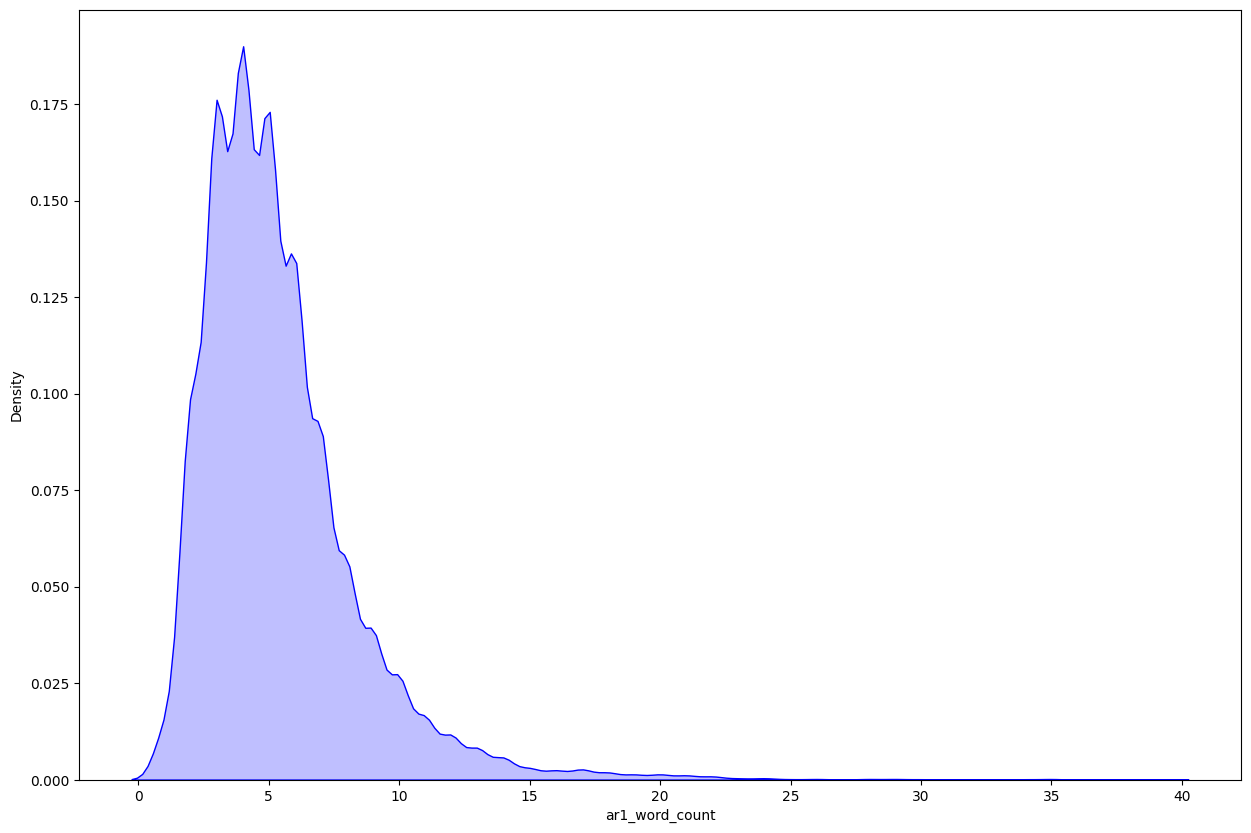

In [22]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.ar1_word_count, shade=True, color='blue', label='Real')

In [23]:
df.drop(['ar1_word_count','ar2_word_count','ar1_char_count','ar2_char_count'], axis=1, inplace=True)
df

,source,target
0,موجود في نهاية الممر، بجيب لك شوي الحين اذا اح...,إنها في أخر القاعة سوف آتي لك ببعض منها الآن ...
1,تسوي تعديلات؟,هل تقومون بعمل تعديلات ؟
2,بغينا طاولة يم الدريشة,نريد مائدة بجانب النافذة
3,هو ذاك الصوب، بالضبط جدام استعلامات السياح بالضبط,هناك ، أمام بيانات السائح تماما
4,ما قط سمعت بهالعنوان في هالمنطقة من قبل,لم اسمع بهذا العنوان من قبل بالقرب من هنا
...,...,...
19995,فيه مكتبة قريبة من هنا؟,هل ثمة محل قريب لبيع الكتب ؟
19996,بروح لمدرسة صيفية في جامعة هاواي,سأحضر المدرسة الصيفية بجامعة هاواي
19997,وين نمر الان؟,ما هذا المكان الذي نمر به الآن ؟
19998,اثنين بالغين و طفل عمره ثلاث سنوات,اثنان كبار وطفل عمره ثلاث سنوات


In [24]:
df.target = df.target.apply(lambda x: 'sos '+ x +' eos')

In [25]:
ar1_texts = df.source.to_list()
ar2_texts = df.target.to_list()

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [27]:
def tokenize_sent(text):

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)

    return tokenizer, tokenizer.texts_to_sequences(text)

In [28]:
ar1_tokenizer, ar1_encoded= tokenize_sent(text= ar1_texts)
ar2_tokenizer, ar2_encoded= tokenize_sent(text= ar2_texts)

In [29]:
ar1_encoded[100:105]

[[173, 984],
 [1, 36, 663, 4, 1256, 2627],
 [36, 175, 5504],
 [7, 1157, 824, 5, 4138],
 [10, 8182, 1257]]

In [30]:
ar1_index_word = ar1_tokenizer.index_word

In [31]:
ENG_VOCAB_SIZE = len(ar1_tokenizer.word_counts)+1
ENG_VOCAB_SIZE

17203

In [32]:
ar2_encoded[30:305]

[[1, 17, 2739, 10, 547, 2],
 [1, 28, 254, 704, 5660, 1933, 10, 5090, 3, 2],
 [1, 5, 1362, 1258, 904, 864, 3356, 107, 170, 72, 3, 2],
 [1, 68, 4819, 12, 590, 959, 4, 109, 865, 815, 323, 2],
 [1, 57, 4820, 5091, 323, 2],
 [1, 17, 590, 120, 7023, 8, 7024, 3, 2],
 [1, 65, 1363, 30, 7, 4, 9, 446, 72, 2],
 [1, 5, 21, 6, 435, 386, 4, 9, 3, 2],
 [1, 5, 22, 7025, 3, 2],
 [1, 1934, 27, 5661, 7026, 2],
 [1, 13, 535, 2740, 905, 1259, 2],
 [1, 17, 2741, 3, 2],
 [1, 13, 1364, 1180, 2],
 [1, 365, 154, 229, 3, 2],
 [1, 5, 5092, 5662, 22, 3, 2],
 [1, 67, 43, 1021, 48, 866, 213, 8, 263, 657, 1475, 162, 8, 1181, 170, 2],
 [1, 5, 21, 6, 2096, 1260, 905, 3, 2],
 [1, 99, 19, 1762, 21, 6, 376, 651, 299, 3, 2],
 [1, 14, 11, 3, 2],
 [1, 5, 31, 6, 7027, 39, 51, 6, 684, 10, 1022, 3, 2],
 [1, 354, 1935, 7028, 2356, 279, 33, 447, 8, 115, 591, 75, 2742, 3, 2],
 [1, 4, 9, 5663, 2743, 7029, 4, 5664, 2],
 [1, 5, 36, 18, 185, 1476, 1261, 112, 4, 18, 2],
 [1, 548, 5665, 4821, 4, 9, 2],
 [1, 5, 36, 50, 2097, 468, 3, 2],


In [33]:
ar2_index_word= ar2_tokenizer.index_word

In [34]:
ar2_word_index =ar2_tokenizer.word_index

In [35]:
MAR_VOCAB_SIZE=len(ar2_tokenizer.word_counts)+1
MAR_VOCAB_SIZE

13561

In [36]:
max_ar1_len = 0
for i in range(len(ar1_encoded)):
    if len(ar1_encoded[i]) > max_ar1_len:
        max_ar1_len= len(ar1_encoded[i])

max_ar2_len = 0
for i in range(len(ar2_encoded)):
    if len(ar1_encoded[i]) > max_ar2_len:
        max_ar2_len= len(ar2_encoded[i])

In [37]:
print(max_ar1_len)
max_ar2_len

39


48

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
ar1_padded = pad_sequences(ar1_encoded, maxlen=max_ar1_len, padding='post')
ar2_padded = pad_sequences(ar2_encoded, maxlen=max_ar2_len, padding='post')

In [40]:
ar1_padded.shape

(20000, 39)

In [41]:
ar2_padded.shape

(20000, 48)

In [42]:
ar1_padded= np.array(ar1_padded)
ar2_padded= np.array(ar2_padded)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(ar1_padded, ar2_padded, test_size=0.01, random_state=42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19800, 39), (200, 39), (19800, 48), (200, 48))

In [46]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Bidirectional, Add, Concatenate, Dropout
from tensorflow.keras import Input, Model

In [47]:
# Eoncoder
encoder_input = Input(shape=(None, ))
encoder_embd = Embedding(ENG_VOCAB_SIZE,1000, mask_zero=True)(encoder_input)
encoder_lstm = LSTM(250, return_state=True)
encoder_output,state_h, state_c = encoder_lstm(encoder_embd)

encoder_states= [state_h, state_c]

# Decoder
decoder_input = Input(shape=(None,))

decoder_embd = Embedding(MAR_VOCAB_SIZE, 1000, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
decoder_lstm = LSTM(250, return_state=True,return_sequences=True )

decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)

decoder_dense= Dense(MAR_VOCAB_SIZE, activation='softmax')

decoder_outputs = decoder_dense(decoder_outputs)

model5 = Model([encoder_input, decoder_input], decoder_outputs)

In [48]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 1000)           1720300   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 embedding_1 (Embedding)     (None, None, 1000)           1356100   ['input_2[0][0]']         

In [49]:
y_train

array([[   1,  226,    7, ...,    0,    0,    0],
       [   1, 1913, 6609, ...,    0,    0,    0],
       [   1, 2920,    4, ...,    0,    0,    0],
       ...,
       [   1,    5, 1019, ...,    0,    0,    0],
       [   1,  542, 4824, ...,    0,    0,    0],
       [   1,  621,   15, ...,    0,    0,    0]], dtype=int32)

In [50]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 1000)           1720300   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 embedding_1 (Embedding)     (None, None, 1000)           1356100   ['input_2[0][0]']         

In [51]:
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/MyDrive/ML/rnn/Machine_Translation/Encoder_decoder/model_checkpoints/model5/", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [53]:
EPOCHS= 10

In [54]:

# Training
encoder_input_data = X_train
decoder_input_data = y_train[:,:-1]
decoder_target_data = y_train[:,1:]

# Testing
encoder_input_test = X_test
decoder_input_test = y_test[:,:-1]
decoder_target_test= y_test[:,1:]

In [55]:
history = model5.fit([encoder_input_data, decoder_input_data],decoder_target_data,
                    epochs=EPOCHS,
                    batch_size=32,
                    validation_data = ([encoder_input_test, decoder_input_test],decoder_target_test ),
                     callbacks= callbacks_list)

Epoch 1/20
619/619 [==============================] - 95s 128ms/step - loss: 5.5160 - accuracy: 0.2860 - val_loss: 4.9020 - val_accuracy: 0.3459
Epoch 2/20
619/619 [==============================] - 49s 79ms/step - loss: 4.2335 - accuracy: 0.3919 - val_loss: 4.1581 - val_accuracy: 0.4152
Epoch 3/20
619/619 [==============================] - 46s 75ms/step - loss: 3.3168 - accuracy: 0.4670 - val_loss: 3.6586 - val_accuracy: 0.4828
Epoch 4/20
619/619 [==============================] - 45s 73ms/step - loss: 2.5295 - accuracy: 0.5724 - val_loss: 3.2600 - val_accuracy: 0.5588
Epoch 5/20
619/619 [==============================] - 47s 76ms/step - loss: 1.9210 - accuracy: 0.6633 - val_loss: 3.0201 - val_accuracy: 0.6231
Epoch 6/20
619/619 [==============================] - 47s 76ms/step - loss: 1.4628 - accuracy: 0.7311 - val_loss: 2.9246 - val_accuracy: 0.6469
Epoch 7/20
619/619 [==============================] - 45s 73ms/step - loss: 1.1093 - accuracy: 0.7924 - val_loss: 2.8942 - val_accuracy

In [70]:

from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras import Input, Model

In [71]:

encoder_model = Model(encoder_input, encoder_states)

In [72]:
decoder_state_input_h = Input(shape=(250,))
decoder_state_input_c= Input(shape=(250,))
decoder_states_input= [decoder_state_input_h, decoder_state_input_c]

dec_embd2 = decoder_embd(decoder_input)
decoder_output2,state_h2, state_c2 = decoder_lstm(dec_embd2, initial_state=decoder_states_input)
deccoder_states2= [state_h2, state_c2]

decoder_output2 = decoder_dense(decoder_output2)

decoder_model = Model(
                      [decoder_input]+decoder_states_input,
                      [decoder_output2]+ deccoder_states2)

In [73]:
def get_predicted_sentence(input_seq):

    states_value = encoder_model.predict(input_seq)


    target_seq = np.zeros((1,1))


    target_seq[0, 0] = ar2_word_index['sos']
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = ar2_index_word[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        if (sampled_char == 'eos' or len(decoded_sentence) > 50):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]

    return decoded_sentence

In [74]:
def get_mara_sentence(sequence):
  sentence=""
  for i in sequence:
    if ((i != 0 and i != ar2_word_index['sos']) and i != ar2_word_index['eos']):
      sentence = sentence + ar2_index_word[i]+' '
  return sentence

def get_eng_sent(sequence):
    sentence =''
    for i in sequence:
      if(i!=0):
        sentence = sentence + ar1_index_word[i]+' '
    return sentence

In [75]:
for i in range(17):
  print("ar1 sentence:",get_eng_sent(X_test[i]))
  print("Actual  Sentence:",get_mara_sentence(y_test[i]))
  print("Translated  Sentence:",get_predicted_sentence(X_test[i].reshape(1,39))[:-4])
  print("\n")

ar1 sentence: اي، في واحد في الجانب الثاني من المبنى 
Actual  Sentence: نعم ، يوجد واحد علي الجانب الآخر من المبني 
1/1 [==============================] - 0s 22ms/step
Translated  Sentence:  نعم في بادئ الأمر ، من فضلك حاول أن أجده


ar1 sentence: عندنا روز واين ممتاز 
Actual  Sentence: لدينا نبيذ ورد ممتاز 
1/1 [==============================] - 0s 39ms/step
Translated  Sentence:  لدينا نبيذ أبيض ممتاز


ar1 sentence: اسمي ساتو 
Actual  Sentence: اسمي ساتو 
1/1 [==============================] - 0s 40ms/step
Translated  Sentence:  اسمي ساتو


ar1 sentence: بوصل على الساعة اربع المسا 
Actual  Sentence: سأكون هناك في حوالي الرابعة بعد الظهر 
1/1 [==============================] - 0s 34ms/step
Translated  Sentence:  سأصل في حوالي الساعة العاشرة والنصف


ar1 sentence: لي متى شغالة هالتأشيرة؟ 
Actual  Sentence: كم مدة صلاحية هذه الفيزا ؟ 
1/1 [==============================] - 0s 42ms/step
Translated  Sentence:  كم مدة صلاحية هذه الفيزا ؟


ar1 sentence: يمكن اروح البيت او اجرب رحلة حول ال

In [62]:
y_test

array([[   1,   41,    7, ...,    0,    0,    0],
       [   1,   78,  497, ...,    0,    0,    0],
       [   1,  208, 1731, ...,    0,    0,    0],
       ...,
       [   1,   44,  942, ...,    0,    0,    0],
       [   1,   13,  156, ...,    0,    0,    0],
       [   1,   16,    7, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# def calculate_accuracy():
#     total_samples = len(X_test)
#     correct_predictions = 0

#     for i in range(total_samples):
#         input_seq = X_test[i].reshape(1, 39)
#         actual_sentence = get_mara_sentence(y_test[i])
#         predicted_sentence = get_predicted_sentence(input_seq)[:-4]

#         if actual_sentence.strip() == predicted_sentence.strip():
#             correct_predictions += 1

#     accuracy = (correct_predictions / total_samples) * 100
#     return accuracy

# # Call the function to calculate accuracy
# accuracy = calculate_accuracy()
# print("Translation Accuracy: {:.2f}%".format(accuracy))

In [ ]:
def translate_sentence():
    input_sentence = input("Enter  sentence: ")

    # Convert the input sentence to the sequence of word indices
    input_sequence = ar1_tokenizer.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, padding='post')

    # Get the translated sentence
    translated_sentence = get_predicted_sentence(input_sequence)

    # Print the translated sentence
    print("Translated Sentence:", translated_sentence[:-4])

# Call the function to translate a sentence
translate_sentence()